In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import pandas as pd

In [2]:
data = pd.read_pickle('preprocessed_data2.pkl')

In [3]:
textual_columns = ['sender', 'receiver', 'subject', 'body']
data['combined_text'] = data[textual_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

data = data[['combined_text', 'label']] 

X = data['combined_text']
y = data['label']

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Creating a TF-IDF Vectorizer and Naive Bayes pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [7]:
# Making predictions
predictions = model.predict(X_test)

In [8]:
# Evaluating the model
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     18256
         1.0       0.98      0.95      0.97     16975

    accuracy                           0.97     35231
   macro avg       0.97      0.97      0.97     35231
weighted avg       0.97      0.97      0.97     35231

Accuracy: 0.9670176832902841


In [9]:
import pickle

with open('tf_idf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
final_pred = np.where(predictions >= 0.5, 1, 0)

In [12]:
roc_auc = roc_auc_score(y_test, predictions)
cohen_kappa = cohen_kappa_score(y_test, final_pred)
brier_score = brier_score_loss(y_test, final_pred)
log_loss = log_loss(y_test, predictions)

print("ROC AUC:", roc_auc)
print("Cohen Kappa:", cohen_kappa)
print("Brier Score:", brier_score)
print("Log Loss:", log_loss)

ROC AUC: 0.9663023030982046
Cohen Kappa: 0.9338591865319577
Brier Score: 0.032982316709715874
Log Loss: 1.1888031914550858


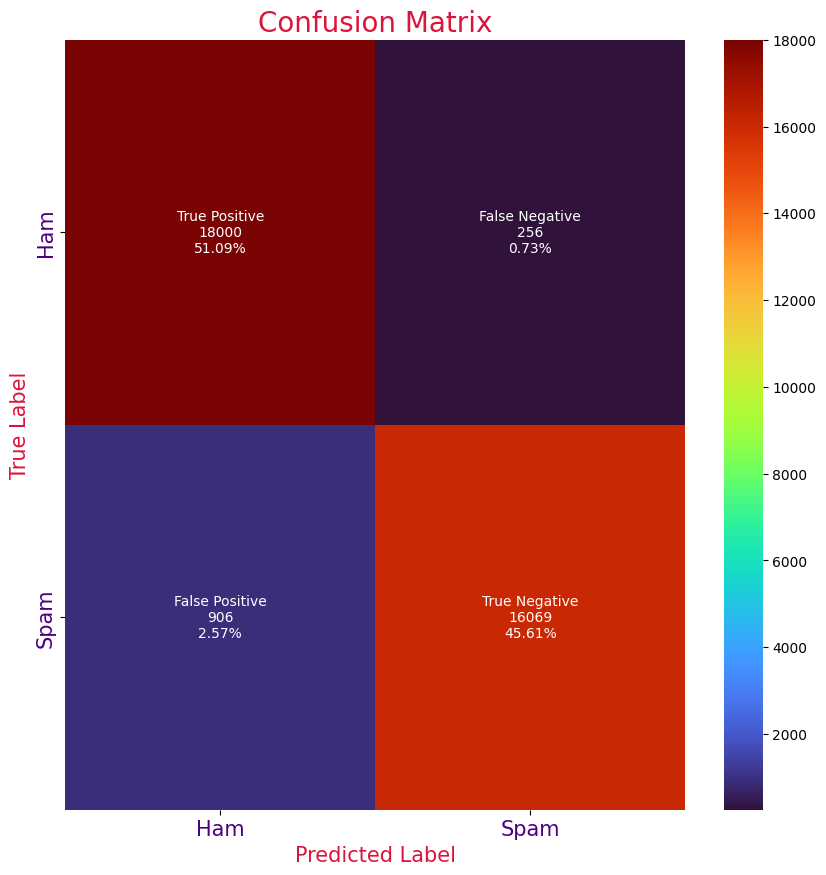

In [13]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test, final_pred)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(my_matrix, annot=labels, cmap="turbo", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

In [14]:
print(classification_report(y_test,final_pred,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.95      0.99      0.97     18256
        Spam       0.98      0.95      0.97     16975

    accuracy                           0.97     35231
   macro avg       0.97      0.97      0.97     35231
weighted avg       0.97      0.97      0.97     35231



In [15]:
model.predict(["Hi, I am a Nigerian prince and I want to give you money"])

array([1.])

In [16]:
loaded_model = pickle.load(open('tf_idf.pkl', 'rb'))

loaded_model.predict(["Hi, I am a Nigerian prince and I want to give you money"])

array([1.])